In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)

In [3]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Features description
- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_train.shape, df_test.shape

((8693, 14), (4277, 13))

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Descriptive features: PassengerId, Name
Numerical features Cabin, Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
Categorical features: HomePlanet, CryoSleep, , Destination, VIP

Target: Transported

## EDA
1. Target Distribution
2. Age Distribution
3. Expenditure features
4. Categorical features
5. Qualitative features

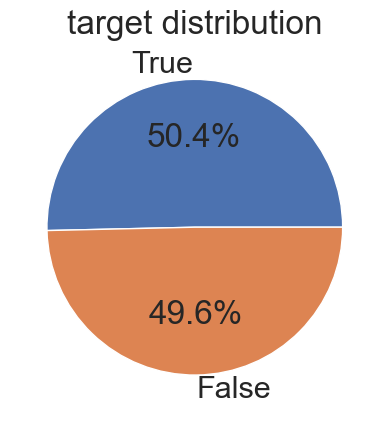

In [11]:
#Target Distribution

fig, ax = plt.subplots()

ax.pie(
    df_train['Transported'].value_counts().values,
    labels=df_train['Transported'].value_counts().index, # Explicitly pass labels
    autopct='%1.1f%%',
)

ax.set_title("target distribution")

plt.show()

Target is Balanced, so no need for under/over-sampling

Text(0.5, 0, 'Age (years)')

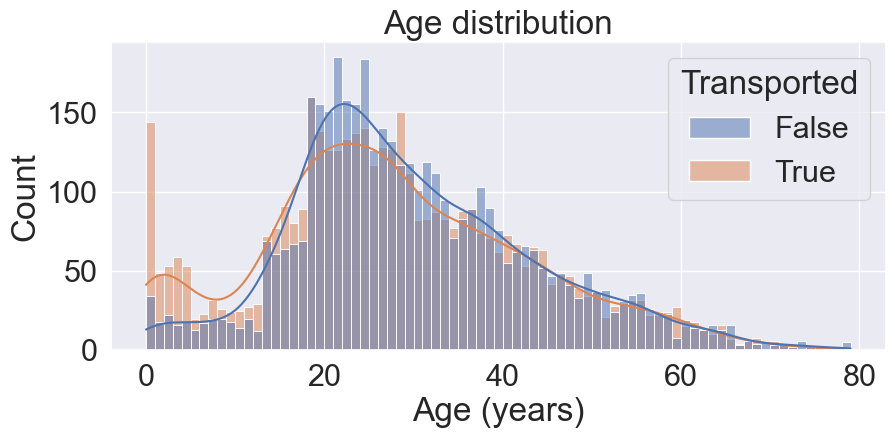

In [12]:
# Age Distribution
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

### Analysis:

- `0-18` Were more likely to get transported
- `19-25` Were more likely not to get transported
- `25+` are 50/50

### Insight:
Feature engineering:
- Child
- Adolescence
- Adult

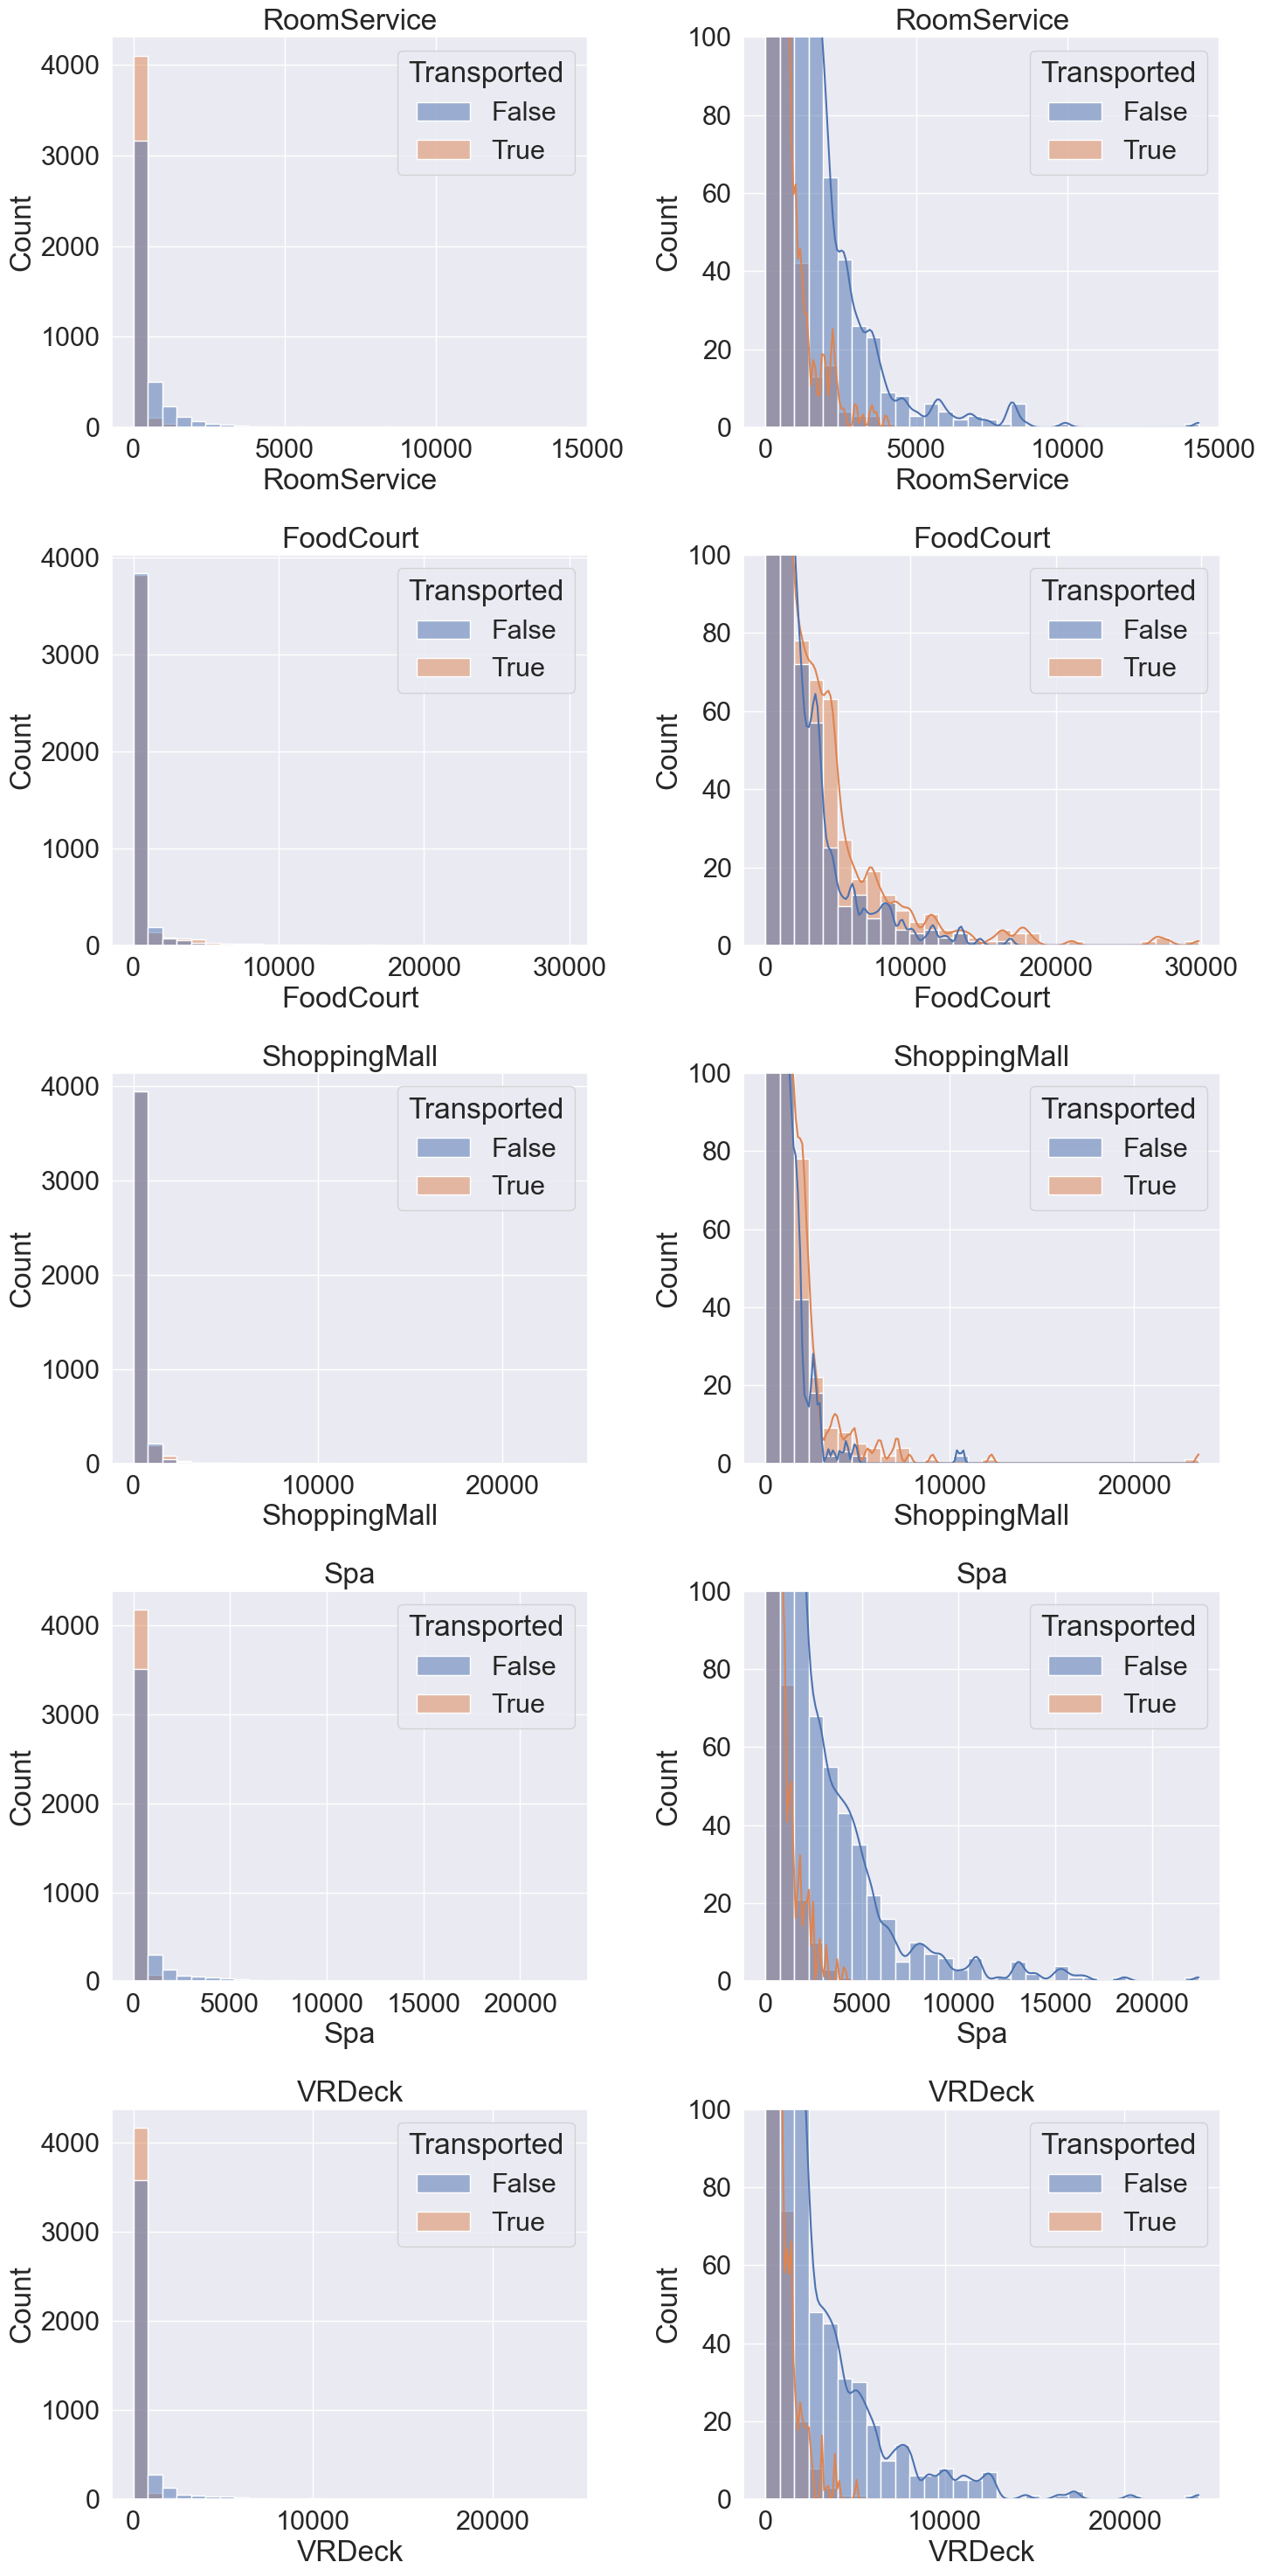

In [13]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(15,30))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df_train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df_train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

### Analysis:

- Most people don't spend any money (as we can see on the left).
- The distribution of spending decays exponentially (as we can see on the right).
- There are a small number of outliers.
- People who were transported tended to spend less.
- RoomService, Spa and VRDeck have different distributions to FoodCourt and ShoppingMall - we can think of this as luxury vs essential amenities.

### Insight:

- Create a new feature that tracks the total expenditure across all 5 amenities.
- Create a binary feature to indicate if the person has not spent anything. (i.e. total expenditure is 0).
- Take the log transform to reduce skew.

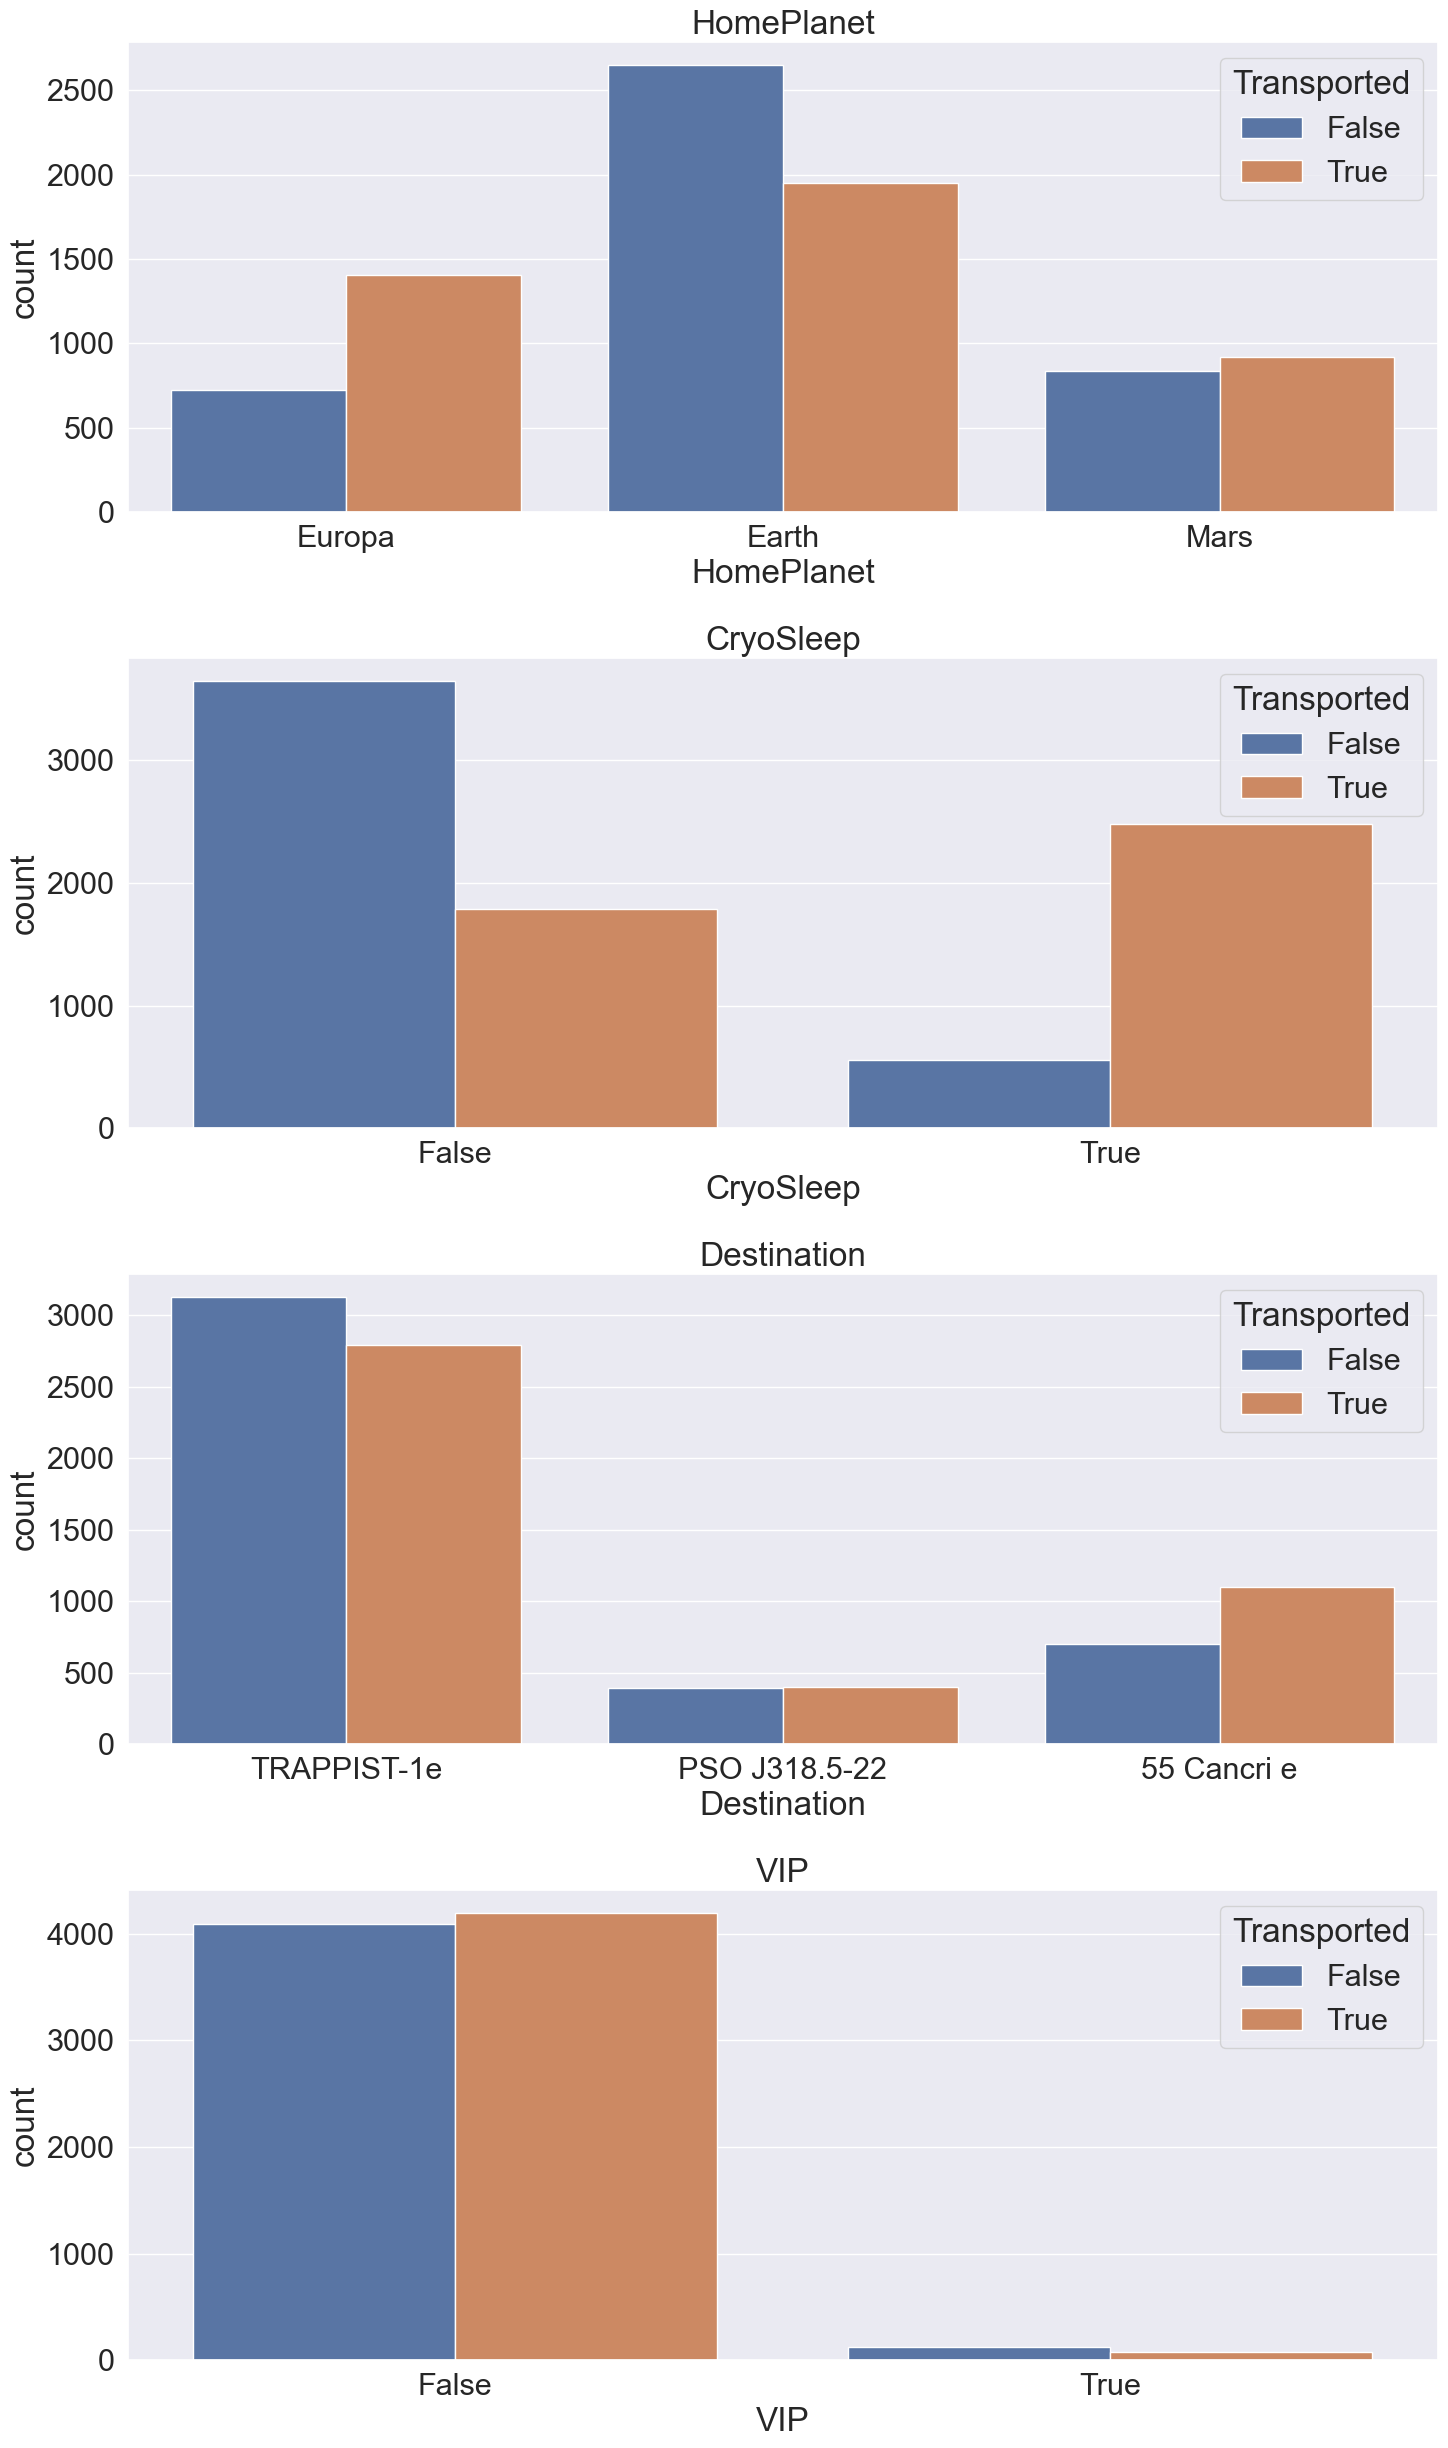

In [14]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


fig=plt.figure(figsize=(15,25))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout() 
plt.show()

### Analysis:

- VIP is more or less equal, so can probably be removed


In [15]:
# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
df_train[qual_feats].head()
df_train['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

### Notes:

- PassengerId takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
- Cabin takes the form deck/num/side, where side can be either P for Port or S for Starboard.

### Insights:

- We can extract the group and group size from the PassengerId feature.
- We can extract the deck, number and side from the cabin feature.
- We could extract the surname from the name feature to identify families.

## MISSING VALUES

In [16]:
# Labels and features
y=df_train['Transported'].copy().astype(int)
X=df_train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, df_test], axis=0).reset_index(drop=True)

In [17]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Cabin,299,2.31
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19


Text(0.5, 1.0, 'Heatmap of missing values')

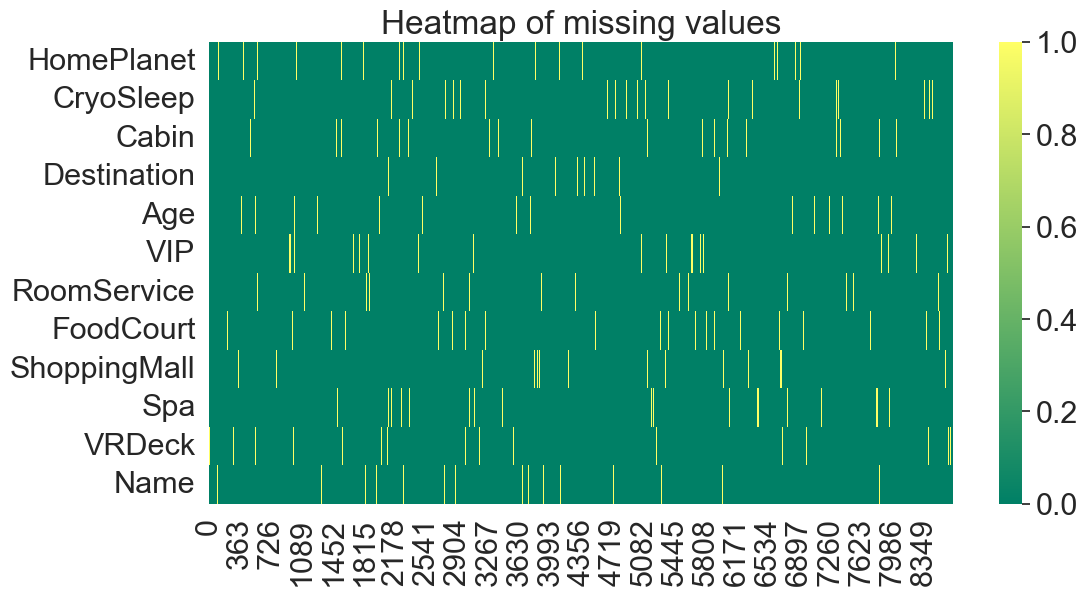

In [18]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df_train[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

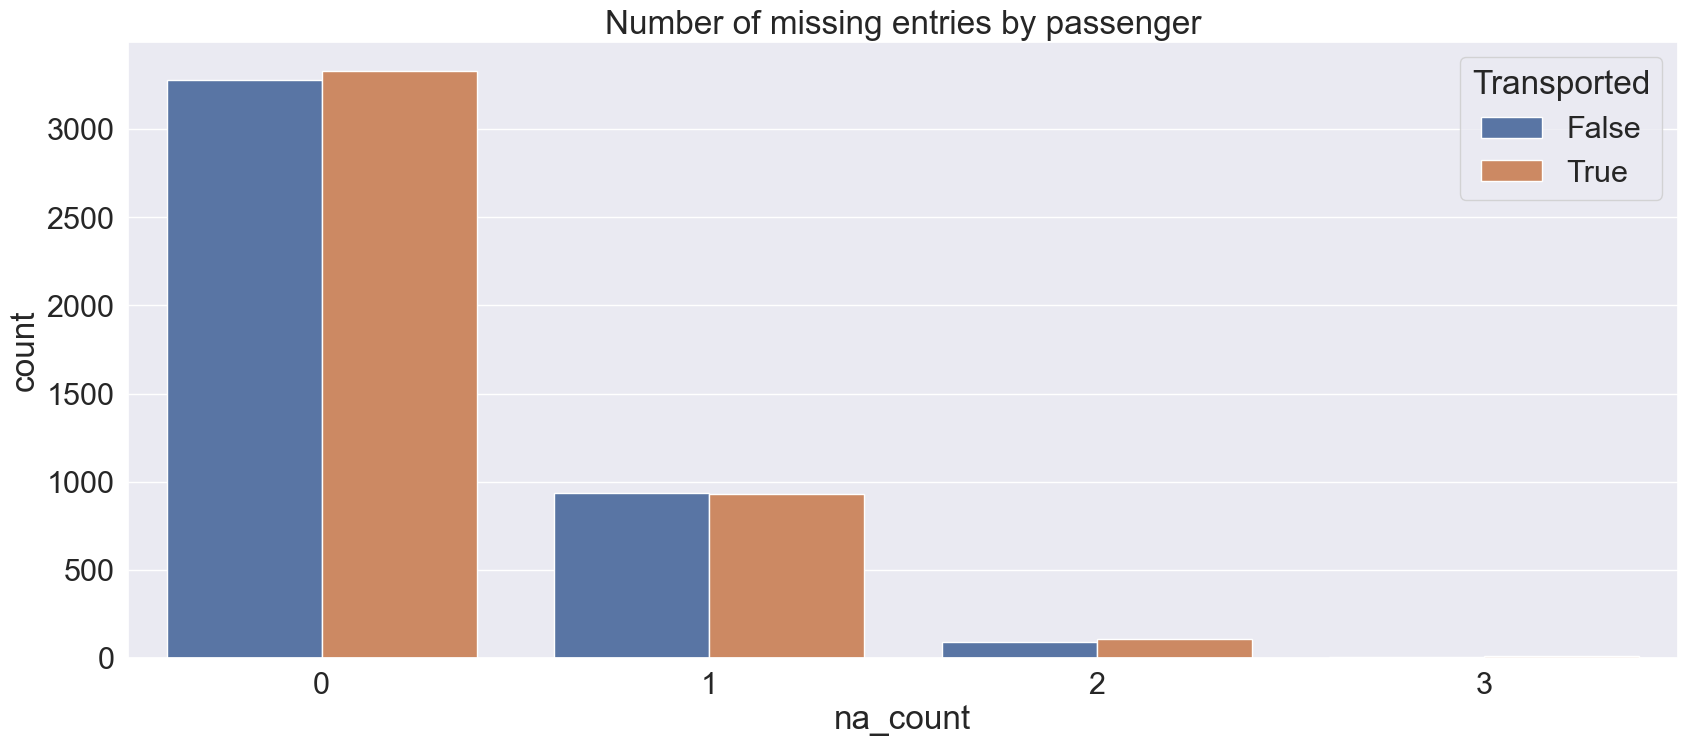

In [19]:
# Countplot of number of missing values by passenger
df_train['na_count']=df_train.isna().sum(axis=1)
plt.figure(figsize=(20,8))
sns.countplot(data=df_train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
df_train.drop('na_count', axis=1, inplace=True)

## Analysis:

- Missing values are independent of the target and for the most part are isolated.
- Even though only 2% of the data is missing, about 25% of all passengers have at least 1 missing value.
- PassengerId is the only (original) feature to not have any missing values.

## Insight:

- Since most of the missing values are isolated it makes sense to try to fill these in as opposed to just dropping rows.
- If there is a relationship between PassengerId and other features we can fill missing values according to this column.

In [20]:
df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

df_train['Age'] =df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] =df_test['Age'].fillna(df_test['Age'].median())

df_train['VIP'] =df_train['VIP'].fillna(False)
df_test['VIP'] =df_test['VIP'].fillna(False)

df_train['HomePlanet'] =df_train['HomePlanet'].fillna('Mars')
df_test['HomePlanet'] =df_test['HomePlanet'].fillna('Mars')

df_train['Destination']=df_train['Destination'].fillna("PSO J318.5-22")
df_test['Destination']=df_test['Destination'].fillna("PSO J318.5-22")

df_train['CryoSleep'] =df_train['CryoSleep'].fillna(False)
df_test['CryoSleep'] =df_test['CryoSleep'].fillna(False)

df_train['Cabin'] =df_train['Cabin'].fillna('T/0/P')
df_test['Cabin'] =df_test['Cabin'].fillna('T/0/P')

/var/folders/ws/qwb72h7d5bq8gn5bnw4hw33m0000gn/T/ipykernel_7905/1295799693.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['VIP'] =df_train['VIP'].fillna(False)
/var/folders/ws/qwb72h7d5bq8gn5bnw4hw33m0000gn/T/ipykernel_7905/1295799693.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['VIP'] =df_test['VIP'].fillna(False)
/var/folders/ws/qwb72h7d5bq8gn5bnw4hw33m0000gn/T/ipykernel_7905/1295799693.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call re

# FEATURE ENGINEERING

1. Expenditure and No_spending
2. Group and Group_size
3. Cabin location
4. Age groups

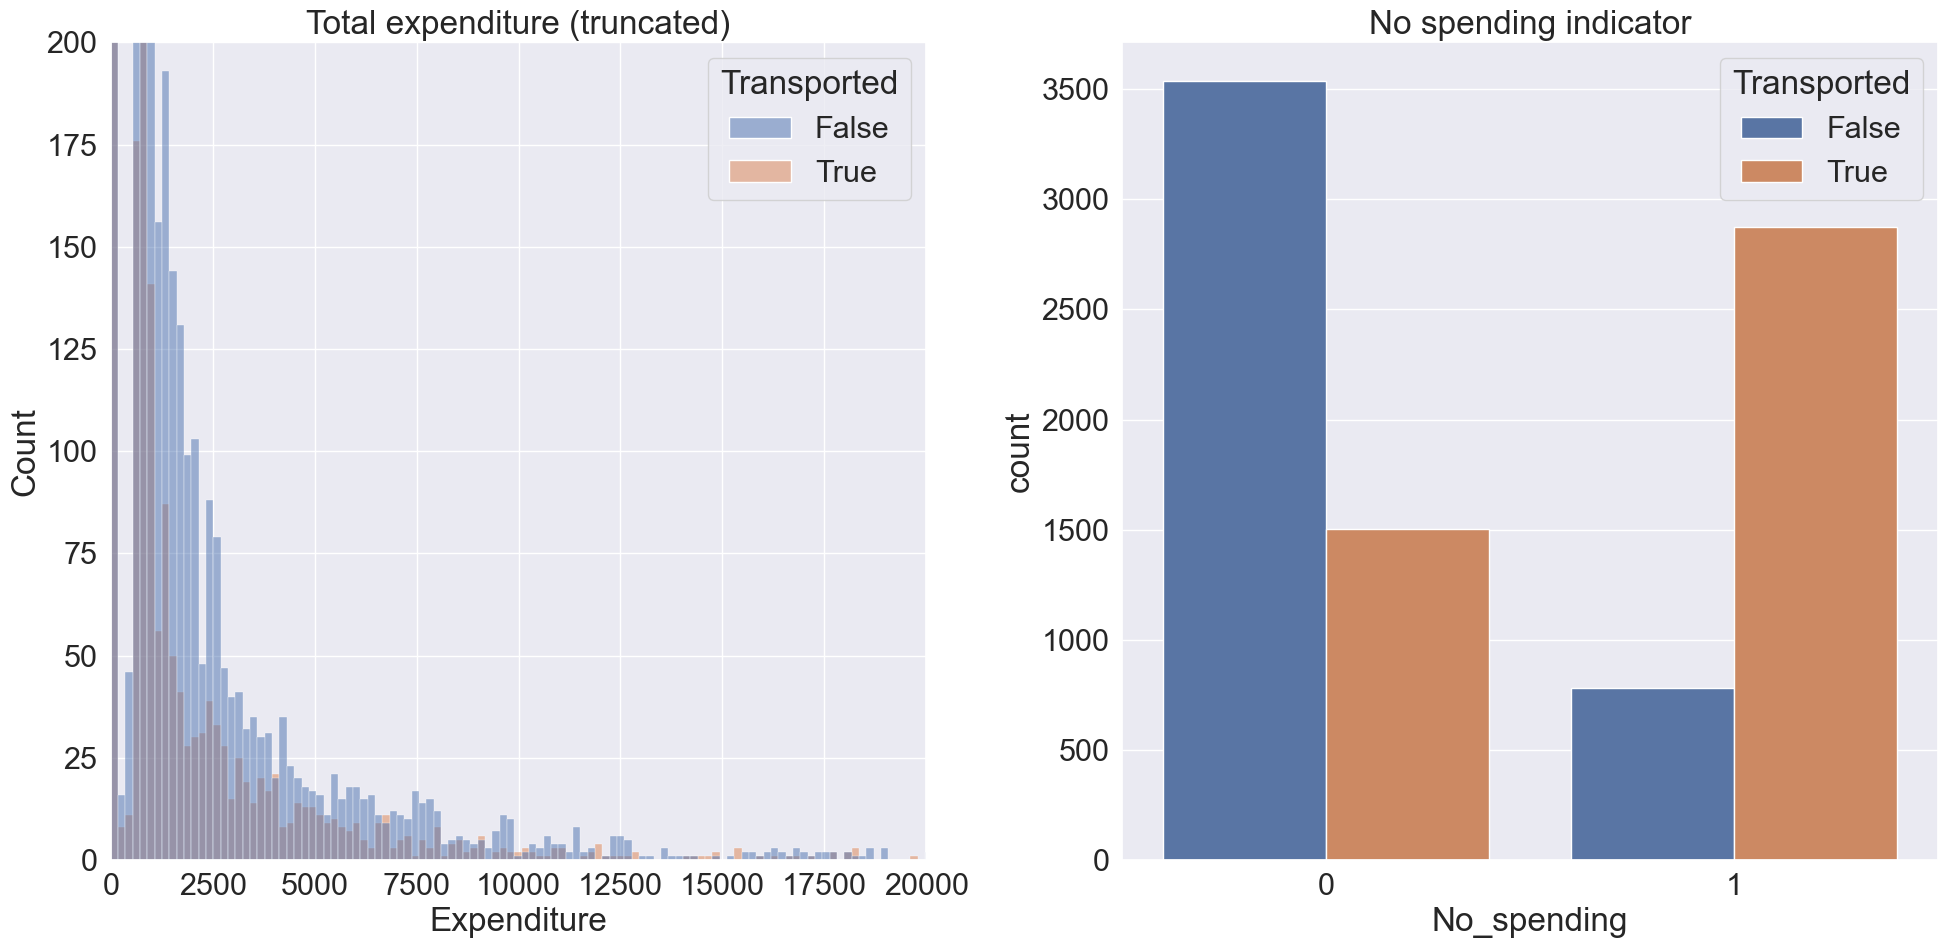

In [21]:
# New features - training set
df_train['Expenditure']=df_train[exp_feats].sum(axis=1)
df_train['No_spending']=(df_train['Expenditure']==0).astype(int)

# New features - test set
df_test['Expenditure']=df_test[exp_feats].sum(axis=1)
df_test['No_spending']=(df_test['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=df_train, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

In [22]:
# Labels and features
y=df_train['Transported'].copy().astype(int)
X=df_train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, df_test], axis=0).reset_index(drop=True)

/Users/leiye/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


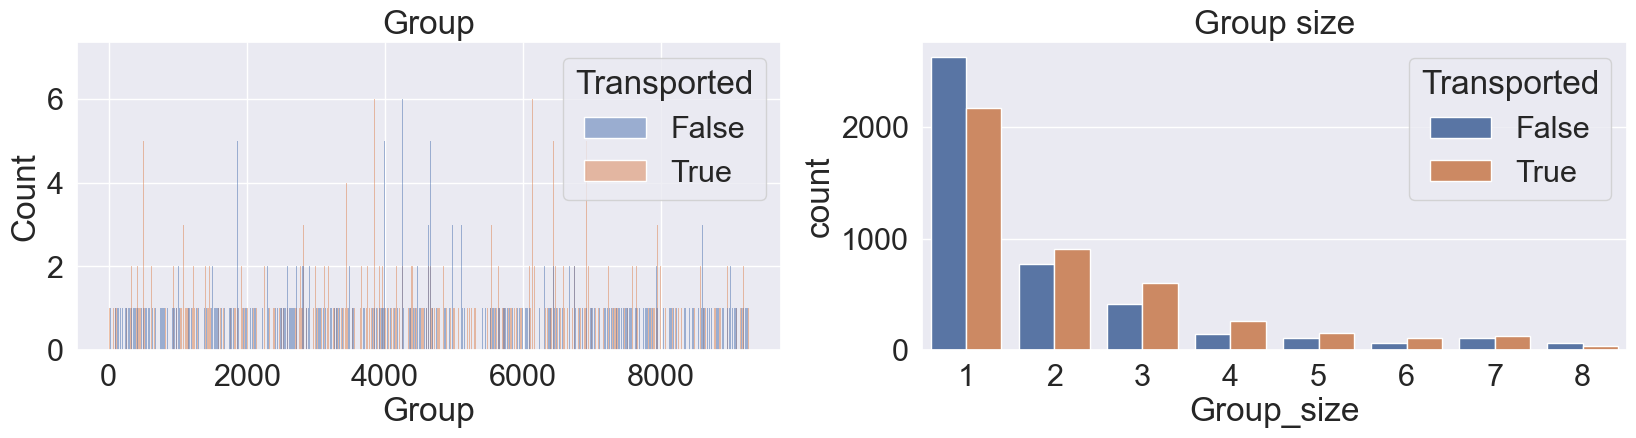

In [23]:
# New feature - Group
df_train['Group'] = df_train['PassengerId'].str.split('_').str[0].astype(int)
df_test['Group'] = df_test['PassengerId'].str.split('_').str[0].astype(int)

# New feature - Group size
df_train['Group_size']=df_train.groupby('Group')['Group'].transform('size')
df_test['Group_size']=df_test.groupby('Group')['Group'].transform('size')

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=df_train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

## Analysis:

1. Group has too big of a cardinality, e.g. would create too many dimensions
2. Single travelers seems to have a bigger chance of survival, lets create a new feature solo traveler!

(0.0, 3000.0)

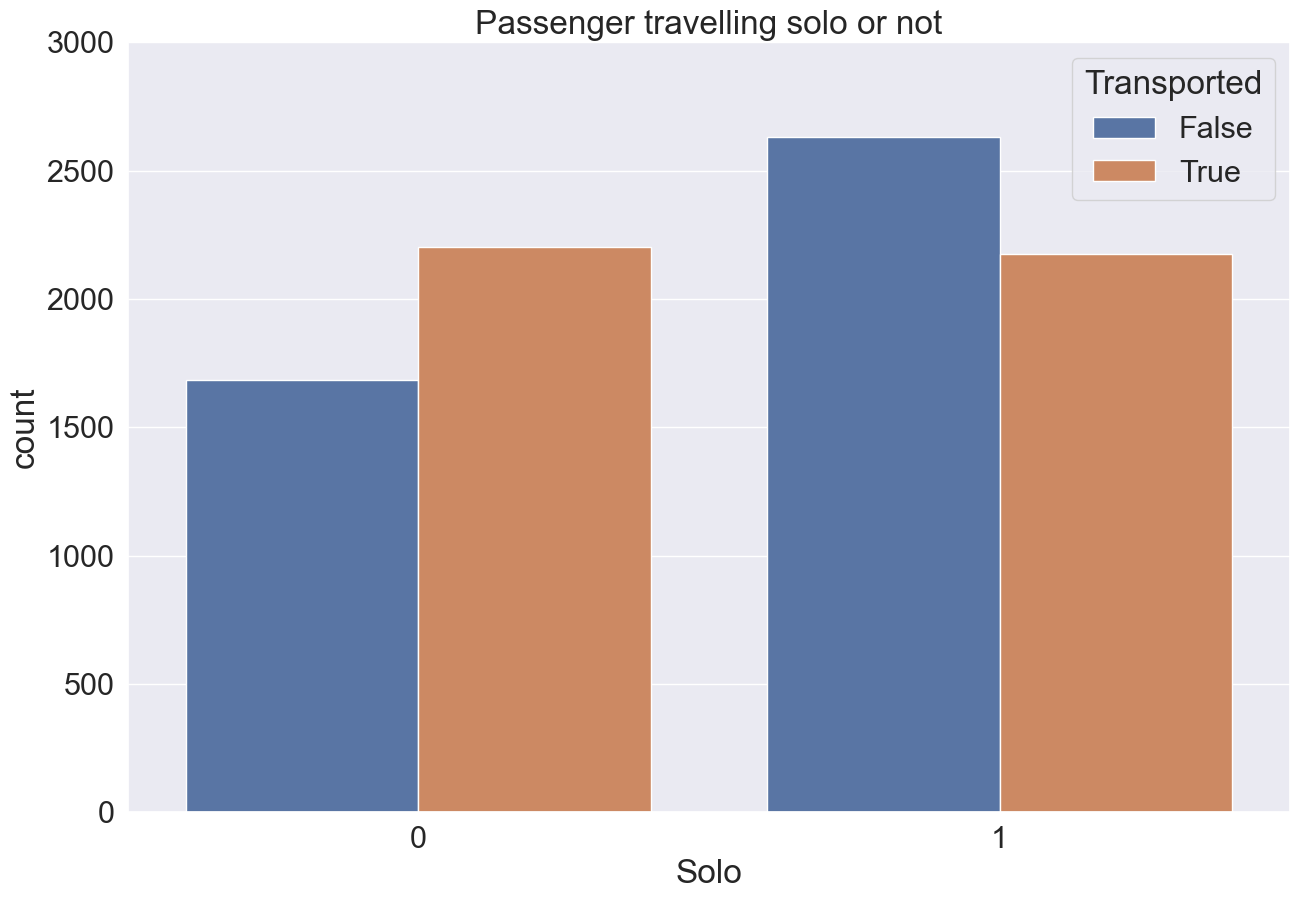

In [24]:
# New feature
df_train['Solo']=(df_train['Group_size']==1).astype(int)
df_test['Solo']=(df_test['Group_size']==1).astype(int)


# New feature distribution
plt.figure(figsize=(15,10))
sns.countplot(data=df_train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

In [25]:
df_train['Cabin'].fillna('Z/9999/Z', inplace=True)
df_test['Cabin'].fillna('Z/9999/Z', inplace=True)

df_train['Cabin_deck'] = df_train['Cabin'].str.split('/').str[0]
df_train['Cabin_number'] = df_train['Cabin'].str.split('/').str[1].astype(int)
df_train['Cabin_side'] = df_train['Cabin'].str.split('/').str[2]

df_test['Cabin_deck'] = df_test['Cabin'].str.split('/').str[0]
df_test['Cabin_number'] = df_test['Cabin'].str.split('/').str[1].astype(int)
df_test['Cabin_side'] = df_test['Cabin'].str.split('/').str[2]

# put back nan to Z/9999/Z values
df_train.loc[df_train['Cabin_deck']=='Z', 'Cabin_deck'] = np.nan
df_train.loc[df_train['Cabin_number']==9999, 'Cabin_number'] = np.nan
df_train.loc[df_train['Cabin_side']=='Z', 'Cabin_side'] = np.nan
df_test.loc[df_test['Cabin_deck']=='Z', 'Cabin_deck'] = np.nan
df_test.loc[df_test['Cabin_number']==9999, 'Cabin_number'] = np.nan
df_test.loc[df_test['Cabin_side']=='Z', 'Cabin_side'] = np.nan

# Drop Cabin (we don't need it anymore)
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)


/var/folders/ws/qwb72h7d5bq8gn5bnw4hw33m0000gn/T/ipykernel_7905/4108310686.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Cabin'].fillna('Z/9999/Z', inplace=True)
/var/folders/ws/qwb72h7d5bq8gn5bnw4hw33m0000gn/T/ipykernel_7905/4108310686.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

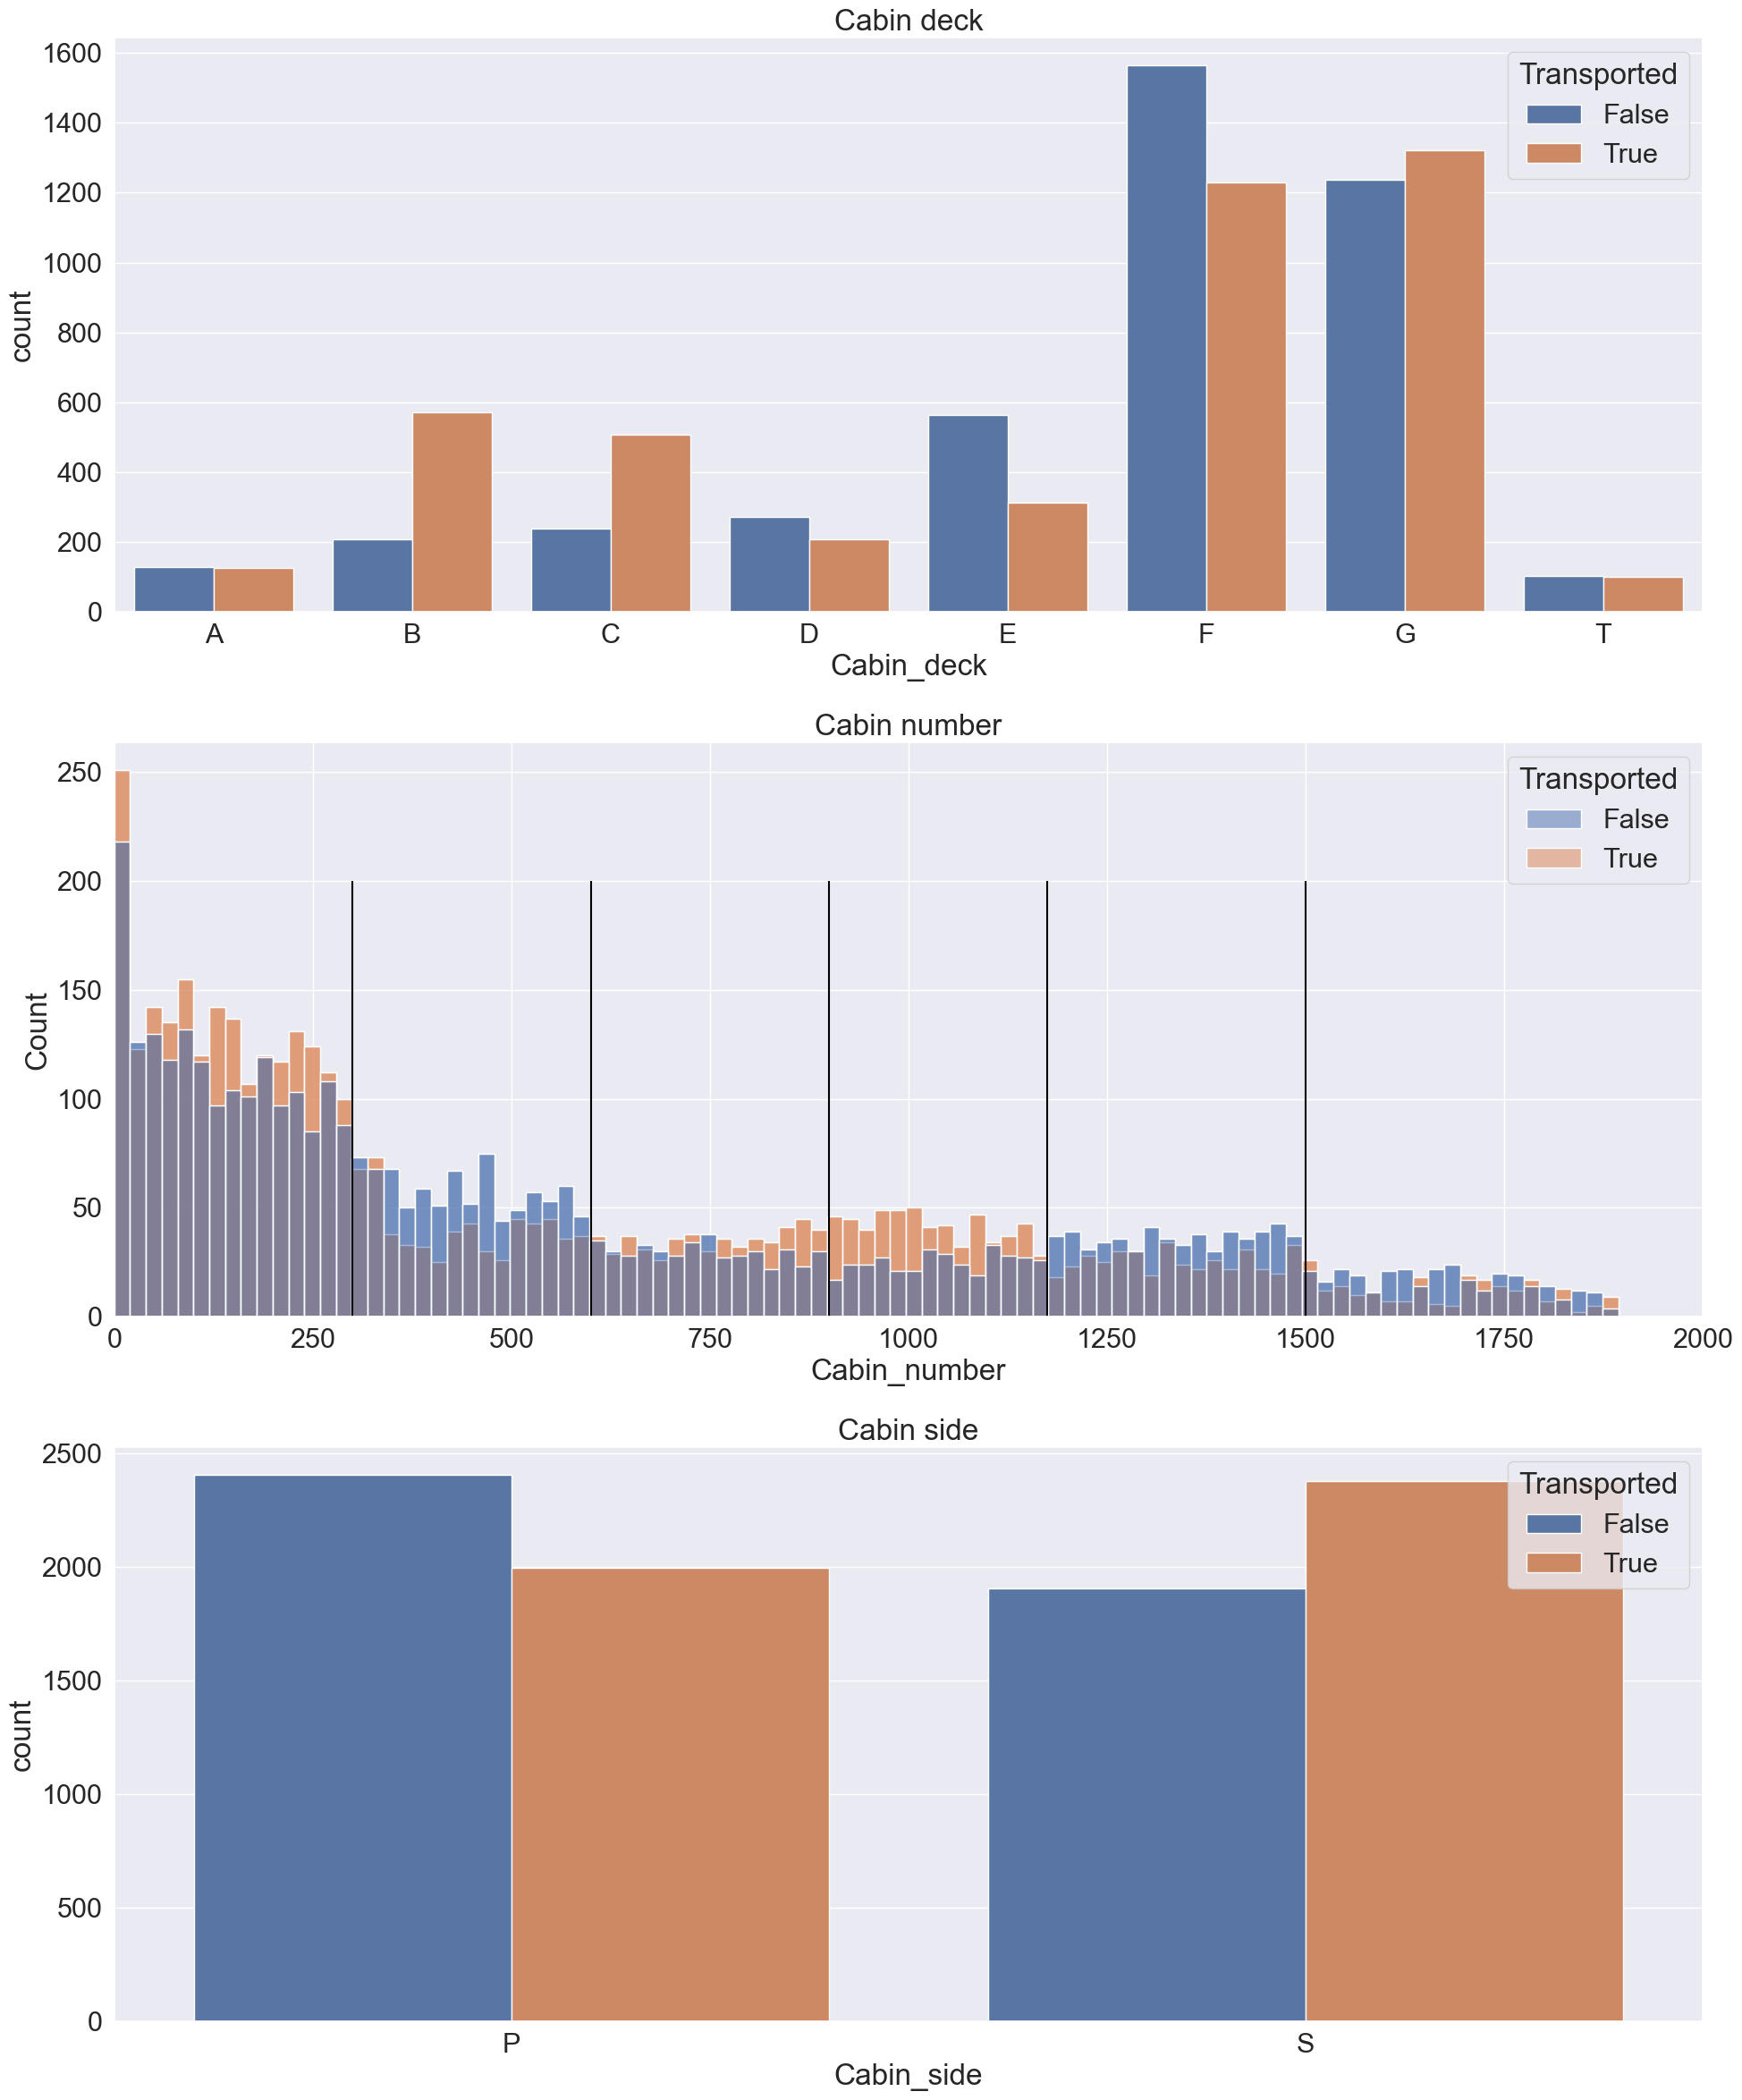

In [26]:
# Plot distribution of new features
fig=plt.figure(figsize=(20,24))
plt.subplot(3,1,1)
sns.countplot(data=df_train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3, 1, 2)
sns.histplot(data=df_train, x='Cabin_number', hue='Transported', binwidth=20)

plt.subplot(3,1,2)
sns.histplot(data=df_train, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1175, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=df_train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

## Analysis:

1. Deck D/E/F seems to have the highest probability of not being transported
1.1. A seems to be VIP with fewest cabins, B/C/D/E seems to be upperclass, while F/G lower class
1.2. Deck T seems to be outliers

2. cabin_number intervalls 300-600 and 1175-1500 seems to have higher chance of net being transported
2.1 0-300 and 600-1175 have higher chance of being transported
2.2 1500+ seems neutral
Lets make it into a categorical intervalls

3. P side have higher chance of not being tranported, and reverse for S side

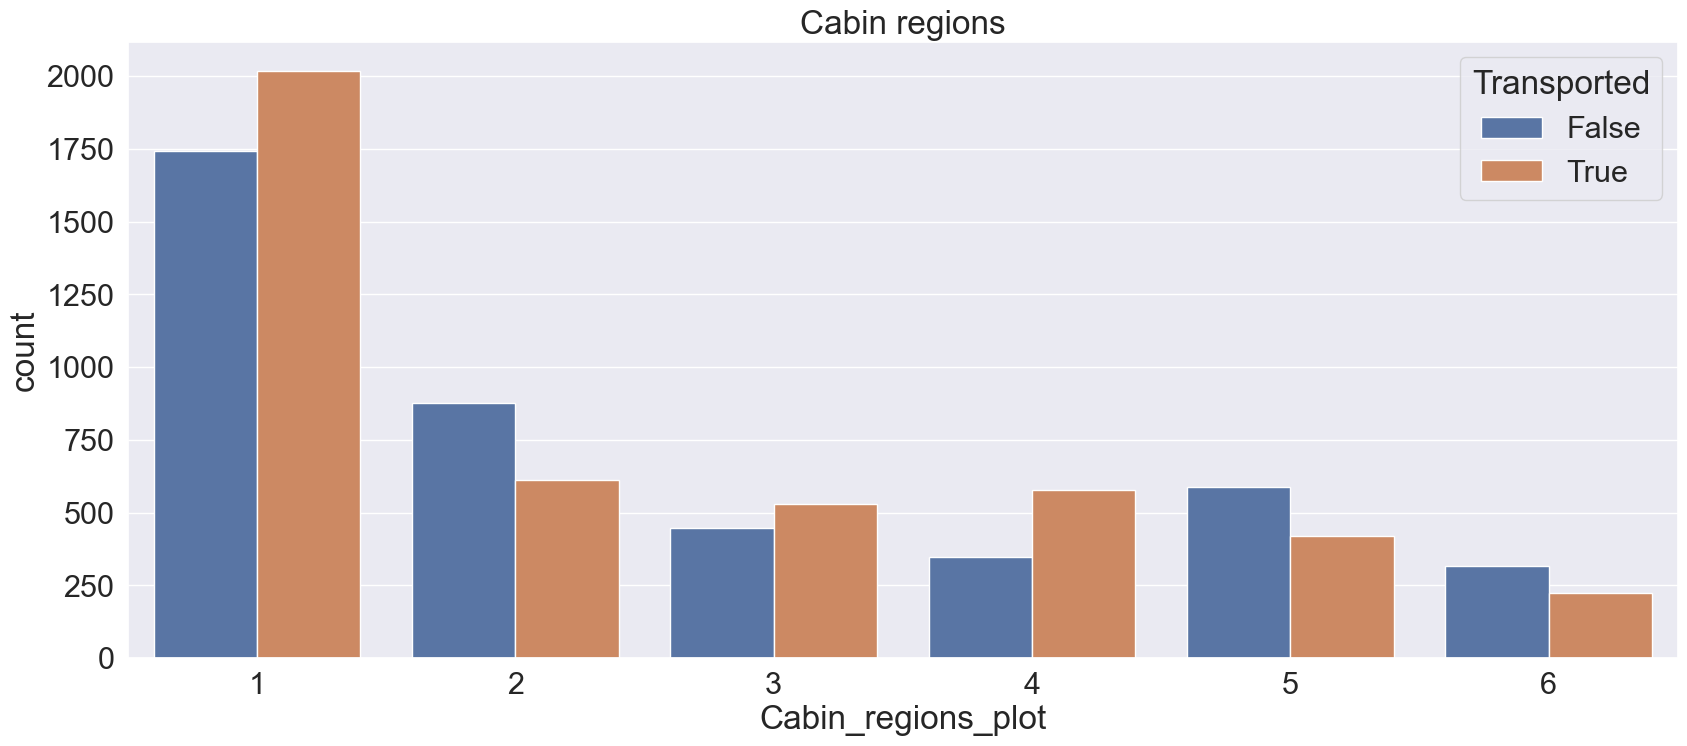

In [27]:
# New features - df_training set
df_train['Cabin_region1']=(df_train['Cabin_number']<300).astype(int)   # one-hot encoding
df_train['Cabin_region2']=((df_train['Cabin_number']>=300) & (df_train['Cabin_number']<600)).astype(int)
df_train['Cabin_region3']=((df_train['Cabin_number']>=600) & (df_train['Cabin_number']<900)).astype(int)
df_train['Cabin_region4']=((df_train['Cabin_number']>=900) & (df_train['Cabin_number']<1175)).astype(int)
df_train['Cabin_region5']=((df_train['Cabin_number']>=1175) & (df_train['Cabin_number']<1500)).astype(int)
df_train['Cabin_region6']=(df_train['Cabin_number']>=1500).astype(int)

# New features - test set
df_test['Cabin_region1']=(df_test['Cabin_number']<300).astype(int)   # one-hot encoding
df_test['Cabin_region2']=((df_test['Cabin_number']>=300) & (df_test['Cabin_number']<600)).astype(int)
df_test['Cabin_region3']=((df_test['Cabin_number']>=600) & (df_test['Cabin_number']<900)).astype(int)
df_test['Cabin_region4']=((df_test['Cabin_number']>=900) & (df_test['Cabin_number']<1175)).astype(int)
df_test['Cabin_region5']=((df_test['Cabin_number']>=1175) & (df_test['Cabin_number']<1500)).astype(int)
df_test['Cabin_region6']=(df_test['Cabin_number']>=1500).astype(int)

# Plot distribution of new features
plt.figure(figsize=(20,8))
df_train['Cabin_regions_plot']=(df_train['Cabin_region1']+2*df_train['Cabin_region2']+3*df_train['Cabin_region3']+4*df_train['Cabin_region4']+5*df_train['Cabin_region5']+6*df_train['Cabin_region6']).astype(int)
sns.countplot(data=df_train, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
df_train.drop('Cabin_regions_plot', axis=1, inplace=True)

## PREPROCESSING

In [28]:
X_test = df_test
y=df_train['Transported'].copy().astype(int)
X=df_train.drop('Transported', axis=1).copy()

# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId', 'Group', 'Group_size', 'Cabin_number'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'Cabin_number'], axis=1, inplace=True)

In [29]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Expenditure',
       'No_spending', 'Solo', 'Cabin_deck', 'Cabin_side', 'Cabin_region1',
       'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5',
       'Cabin_region6'],
      dtype='object')

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8693 non-null   object 
 1   CryoSleep      8693 non-null   bool   
 2   Destination    8693 non-null   object 
 3   Age            8693 non-null   float64
 4   VIP            8693 non-null   bool   
 5   RoomService    8693 non-null   float64
 6   FoodCourt      8693 non-null   float64
 7   ShoppingMall   8693 non-null   float64
 8   Spa            8693 non-null   float64
 9   VRDeck         8693 non-null   float64
 10  Name           8493 non-null   object 
 11  Expenditure    8693 non-null   float64
 12  No_spending    8693 non-null   int64  
 13  Solo           8693 non-null   int64  
 14  Cabin_deck     8693 non-null   object 
 15  Cabin_side     8693 non-null   object 
 16  Cabin_region1  8693 non-null   int64  
 17  Cabin_region2  8693 non-null   int64  
 18  Cabin_re

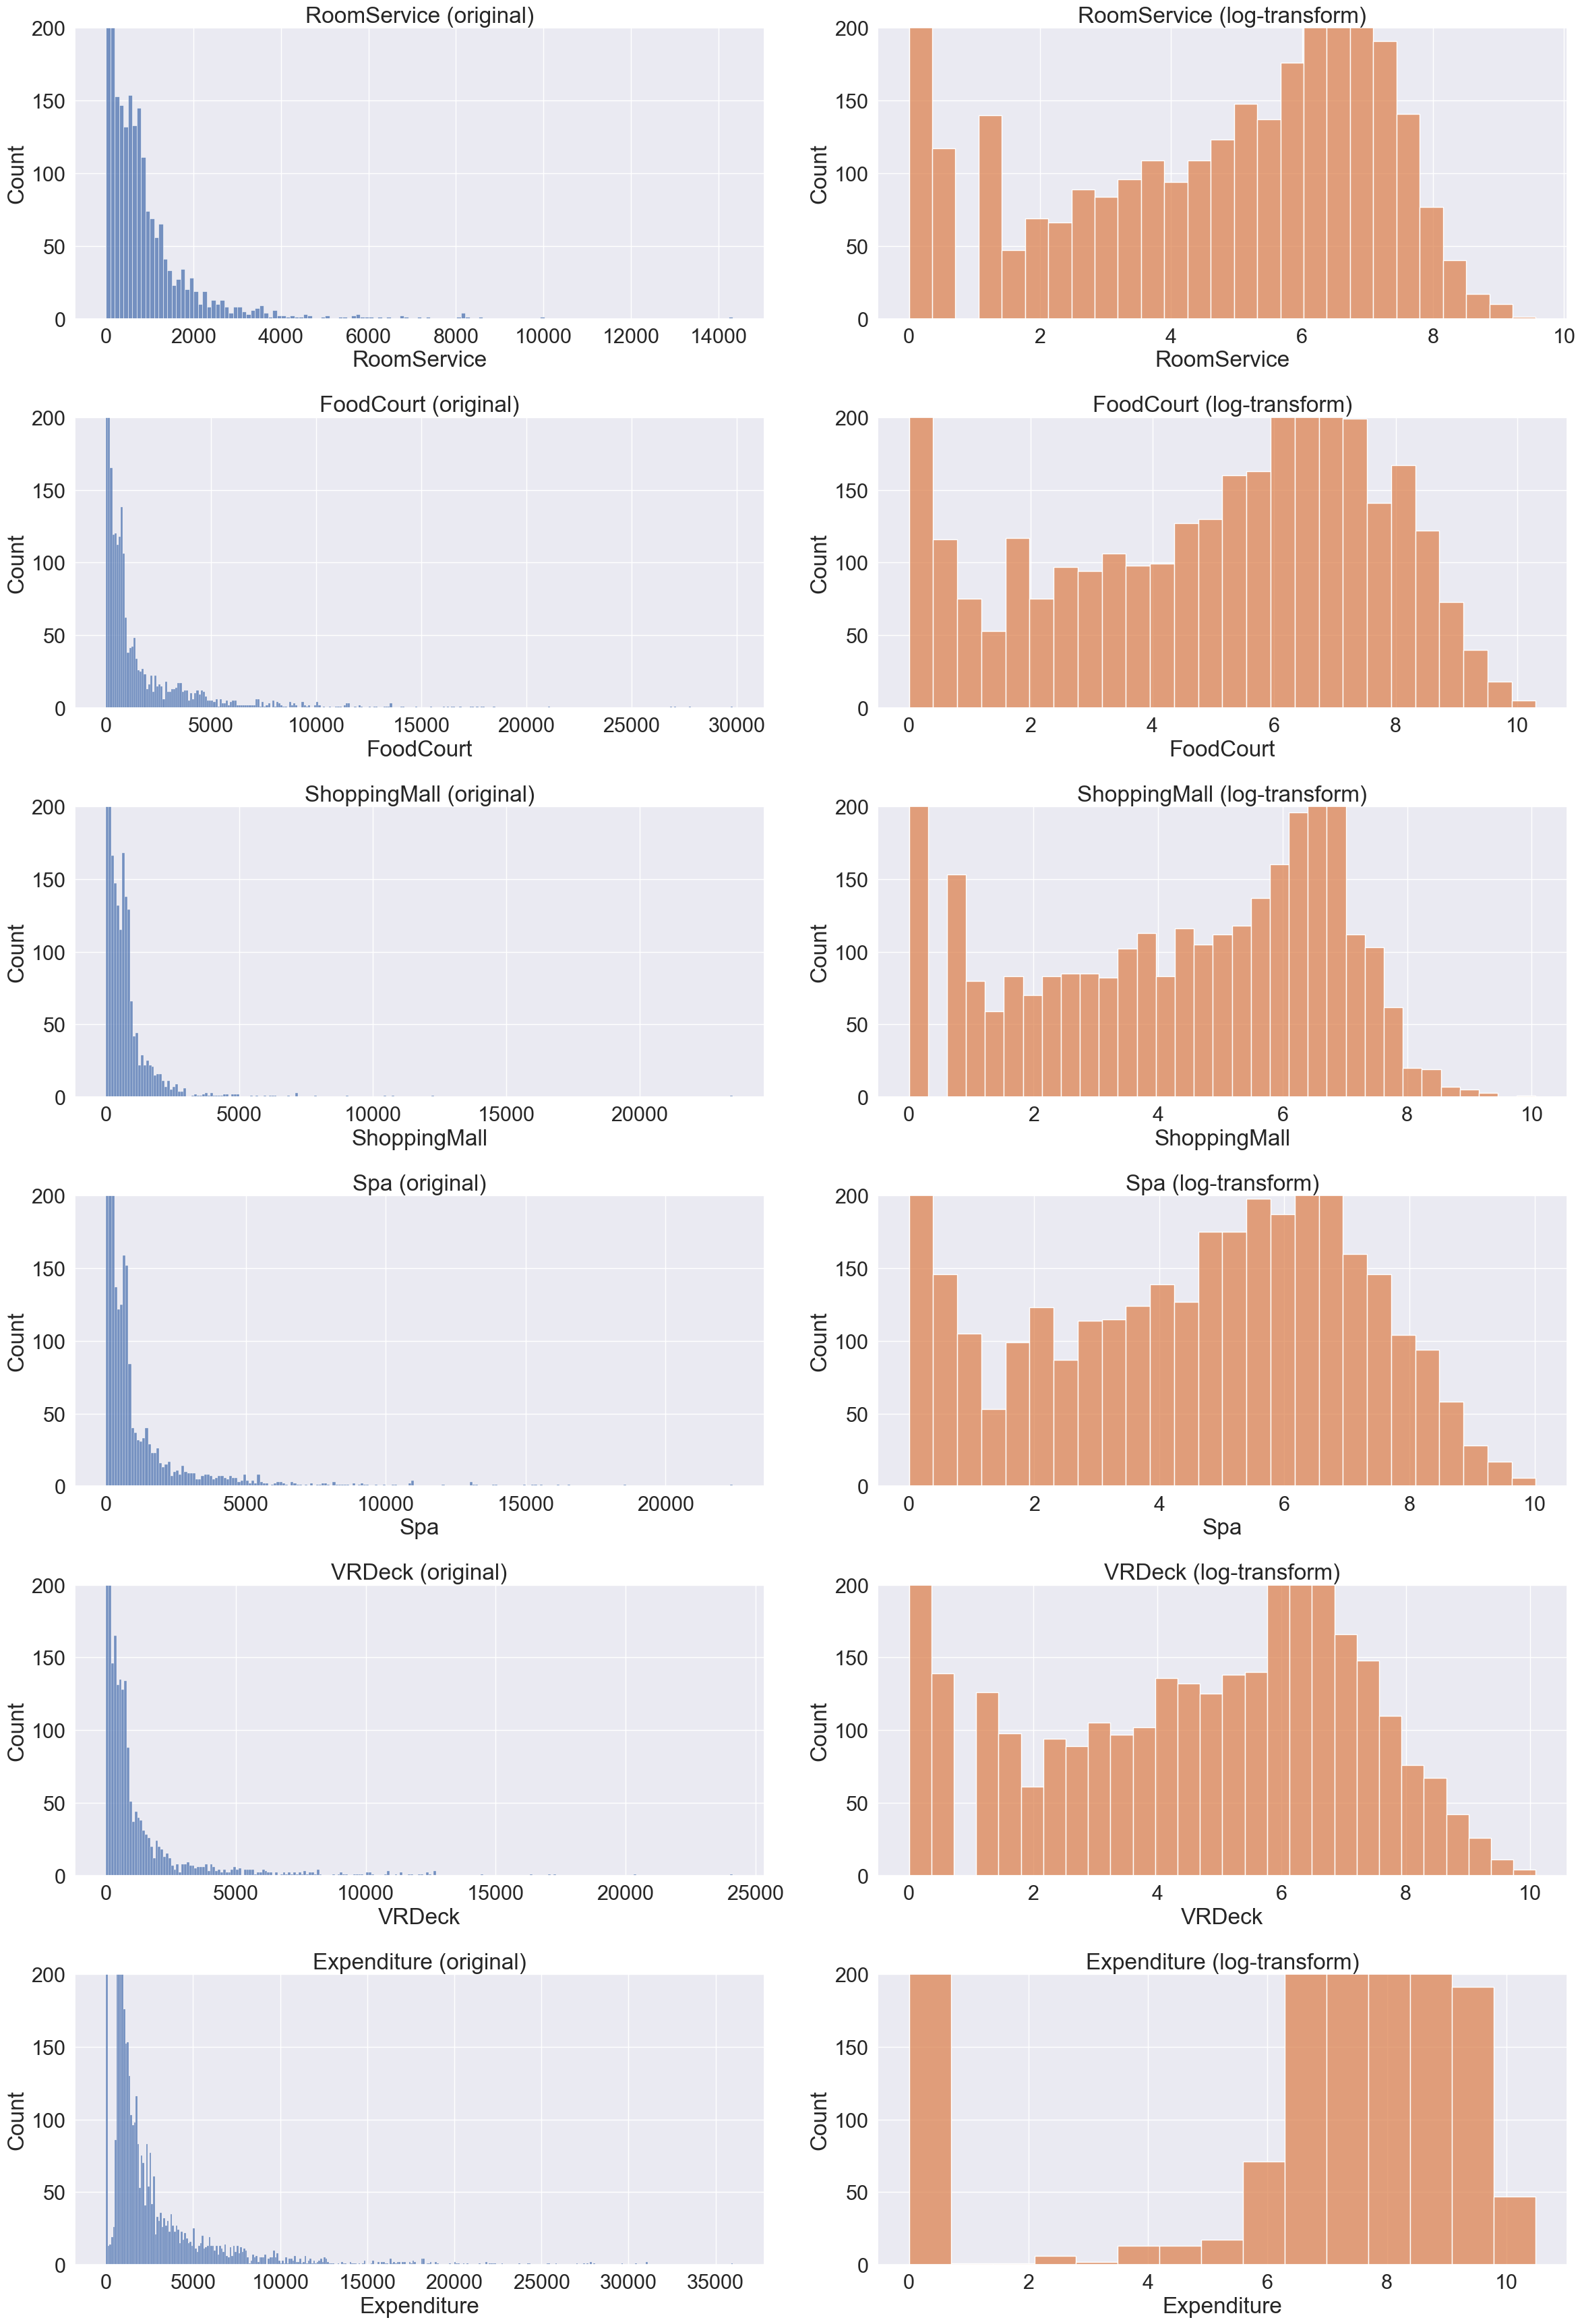

In [31]:
# Plot log transform results
fig=plt.figure(figsize=(24,35))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [32]:
# Apply log transform
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col]) 

### Encoding and scaling

In [ ]:
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
# from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# import eli5
# from eli5.sklearn import PermutationImportance
from sklearn.utils import resample
import plotly.express as px

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [34]:


numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']
binary_passthrough_cols = ['No_spending', 'Solo', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6']
cols_to_drop = ['Name']


numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))])

ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('bin_pass', 'passthrough', binary_passthrough_cols) # Example
    ],
    remainder='drop' # or 'passthrough' if you have other columns
)

X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)

Training set shape: (8693, 32)


In [35]:
type(X), type(X_test)

(numpy.ndarray, numpy.ndarray)

In [36]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y, size=0.1*np.ones(len(X)), opacity = 1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=1000, height=700
)
fig.show()

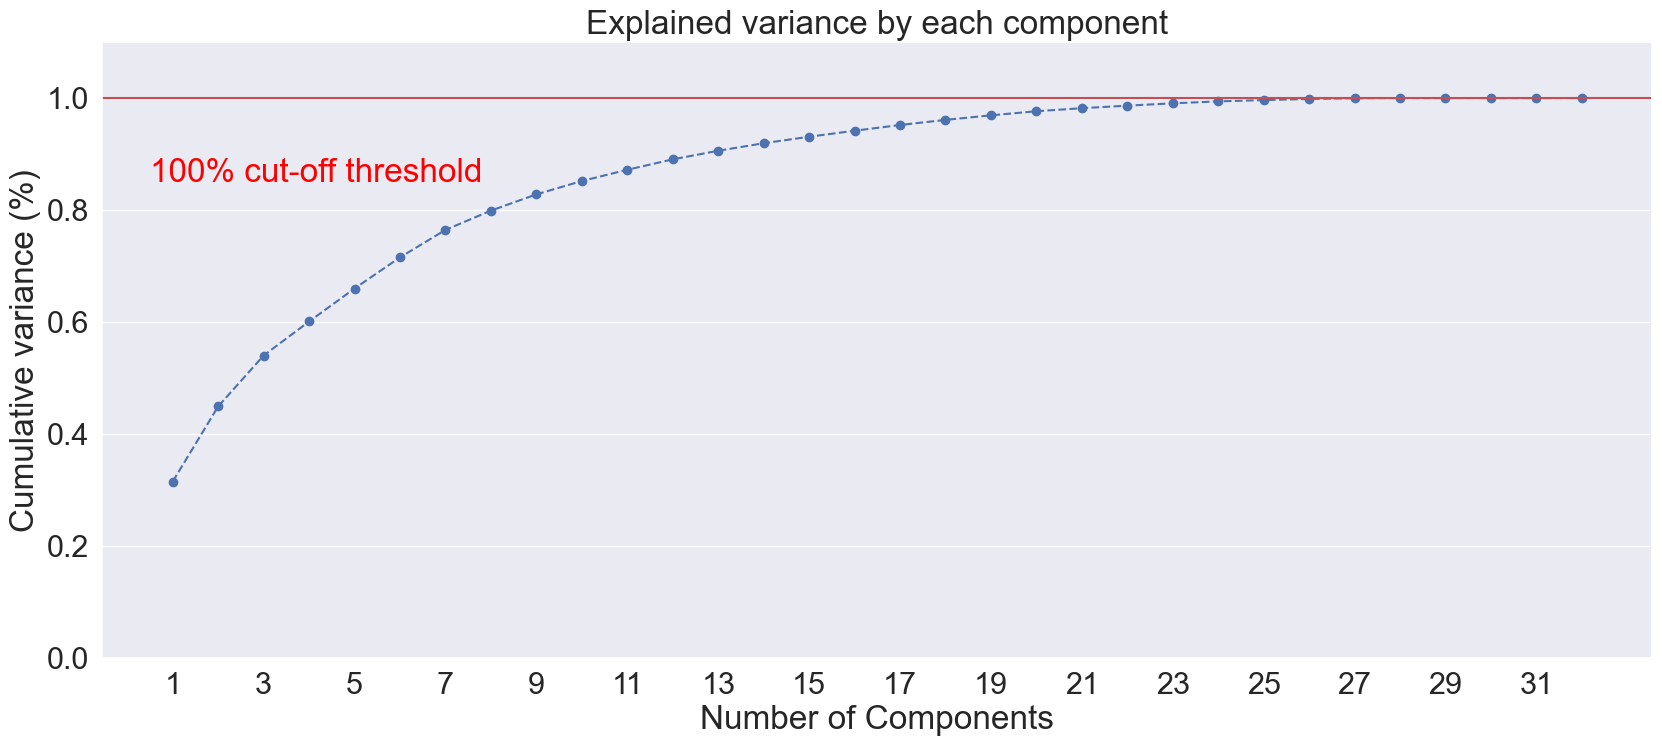

In [37]:
# Explained variance (how important each additional principal component is)
pca = PCA().fit(X)
fig, ax = plt.subplots(figsize=(20,8))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red')
ax.grid(axis='x')

In [38]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

In [39]:
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0),
    #"XGBoost" : XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'), # XGBoost takes too long
    "NaiveBayes": GaussianNB()
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150],
           'solver': ['liblinear']}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : boosted_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "NaiveBayes": NB_grid
}

In [40]:
import time
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_valid, y_valid)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: LogisticRegression
Training time (mins): 0.17

Model: KNN
Training time (mins): 0.04

Model: SVC
Training time (mins): 3.87

Model: RandomForest
Training time (mins): 0.44

Model: NaiveBayes
Training time (mins): 0.0



In [41]:
# Show results
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.767108,0.17
1,KNN,0.750431,0.04
2,SVC,0.796435,3.87
3,RandomForest,0.786084,0.44
4,NaiveBayes,0.741231,0.00


Motivated by this, we will take SVC and RandomForest to the final stage of modelling. However, RandomForest is much lower training time than SVC, even if SVC has a little bit better accuracy.

In [42]:
# Show best parameters from grid search
clf_best_params

{'LogisticRegression': {'C': 0.25,
  'max_iter': 50,
  'penalty': 'l1',
  'solver': 'liblinear'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'SVC': {'C': 1.25, 'gamma': 'scale', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 12, 'n_estimators': 300},
 'NaiveBayes': {'var_smoothing': 1e-10}}

# MODELLING

In [43]:
# Classifiers
best_classifiers = {
    "SVC" : SVC(**clf_best_params["SVC"],probability=True, random_state=0),
    "RandomForest" : RandomForestClassifier(**clf_best_params["RandomForest"], random_state=0),
}

In [44]:
# Number of folds in cross validation
FOLDS=10

preds=np.zeros(len(X_test))
for key, classifier in best_classifiers.items():
    start = time.time()
    
    # 10-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train model
        clf = classifier
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

Model: SVC
Average validation accuracy: 80.62
Training time (mins): 1.59

Model: RandomForest
Average validation accuracy: 80.37
Training time (mins): 0.36



Text(0.5, 0, 'Probability')

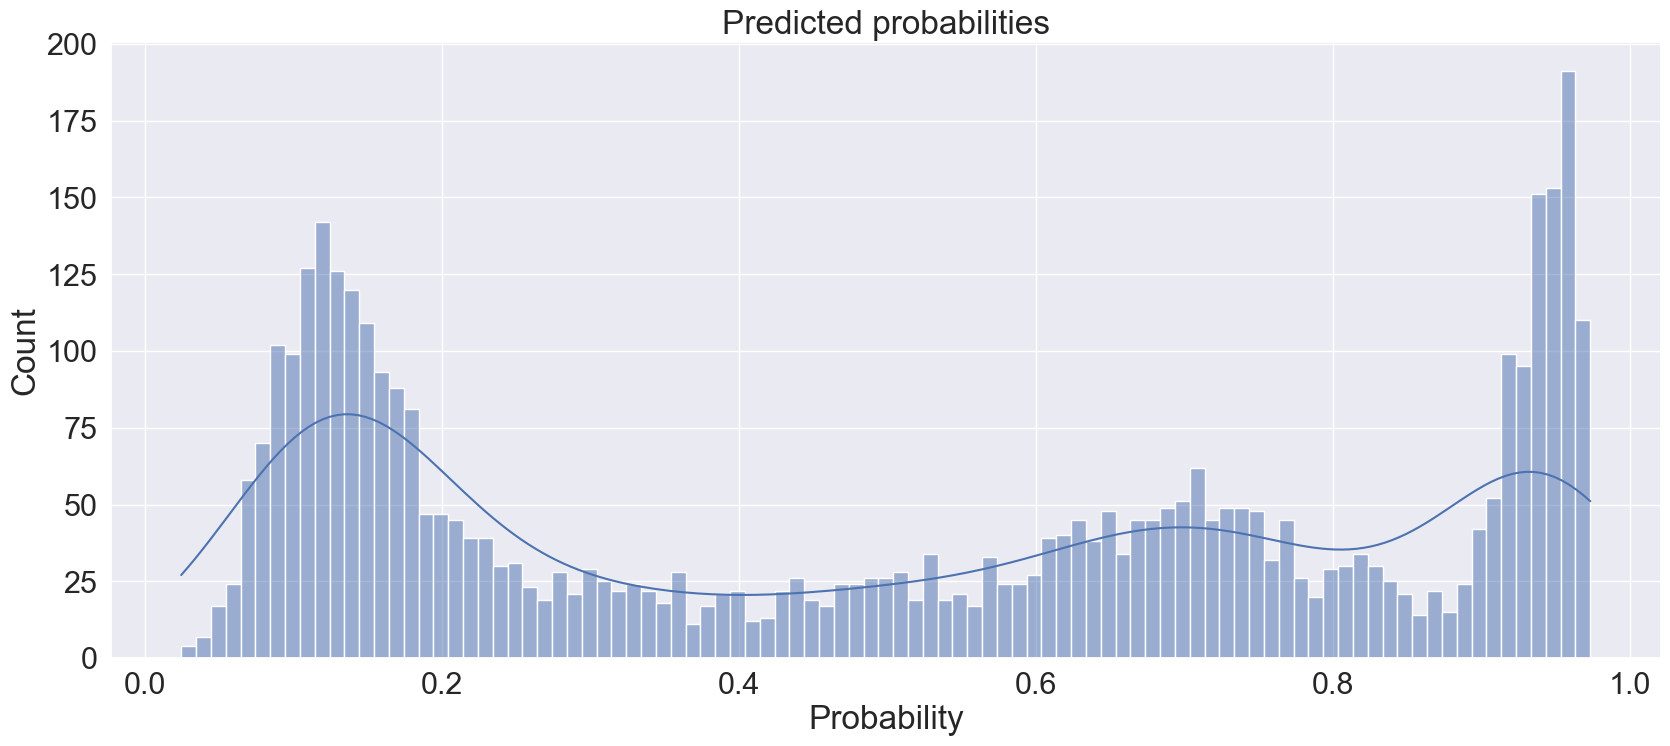

In [45]:
plt.figure(figsize=(20,8))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

In [46]:
# Proportion (in test set) we get from rounding
print(np.round(100*np.round(preds).sum()/len(preds),2))


51.6


In [47]:
preds

array([0.66989688, 0.07779901, 0.96869615, ..., 0.88658066, 0.61140663,
       0.65064837])

In [51]:
threshold = 0.5
binary_predictions = (preds >= threshold).astype(int)

print("\nOriginal probabilities (preds):")
print(preds)
print("\nBinary predictions (0 or 1):")
print(binary_predictions)


Original probabilities (preds):
[0.66989688 0.07779901 0.96869615 ... 0.88658066 0.61140663 0.65064837]

Binary predictions (0 or 1):
[1 0 1 ... 1 1 1]



Submission DataFrame head:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False


Text(0.5, 1.0, 'Prediction distribution')

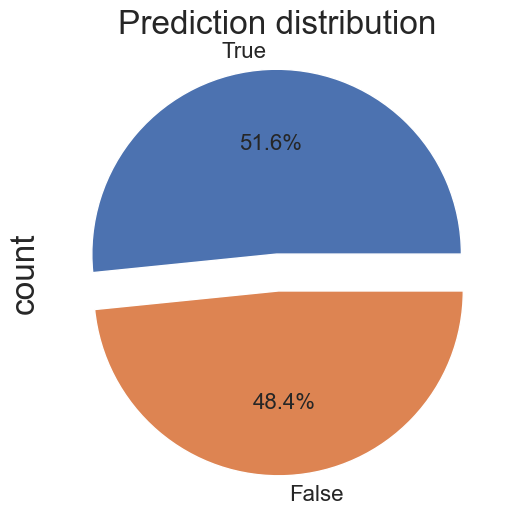

In [52]:
# Sample submission (to get right format)
sub=pd.read_csv('data/sample_submission.csv')

sub['Transported'] = binary_predictions.astype(bool) 
# Convert 0/1 to False/True

print("\nSubmission DataFrame head:")
print(sub.head())

# Prediction distribution
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Prediction distribution")

In [53]:
sub['Transported'].value_counts()

Transported
True     2207
False    2070
Name: count, dtype: int64